<a href="https://colab.research.google.com/github/inhoblock/Data_science_Study-hongongmachine/blob/main/Chapter09_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter9_3

LSTM과 GRU 셀

# LSTM 신경망 훈련하기

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [4]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 37ms/step - loss: 0.6929 - accuracy: 0.5090 - val_loss: 0.6916 - val_accuracy: 0.5780
Epoch 2/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6906 - accuracy: 0.6004 - val_loss: 0.6876 - val_accuracy: 0.6378
Epoch 3/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6853 - accuracy: 0.6506 - val_loss: 0.6775 - val_accuracy: 0.6436
Epoch 4/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6681 - accuracy: 0.6516 - val_loss: 0.6273 - val_accuracy: 0.6934
Epoch 5/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6058 - accuracy: 0.7236 - val_loss: 0.5882 - val_accuracy: 0.7362
Epoch 6/100
313/313 [==============================] - 12s 38ms/step - loss: 0.5788 - accuracy: 0.7459 - val_loss: 0.5695 - val_accuracy: 0.7470
Epoch 7/100
313/313 [==============================] - 12s 37ms/step - loss: 0.5569 - accuracy: 0.7589 - val_loss: 0.5515 - val_ac

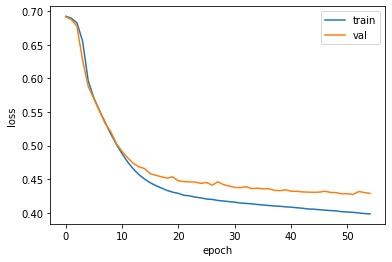

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 순환 층에 드롭아웃 적용하기

In [6]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [7]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 41ms/step - loss: 0.6925 - accuracy: 0.5377 - val_loss: 0.6902 - val_accuracy: 0.6172
Epoch 2/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6887 - accuracy: 0.6124 - val_loss: 0.6797 - val_accuracy: 0.6766
Epoch 3/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6698 - accuracy: 0.6777 - val_loss: 0.6200 - val_accuracy: 0.7184
Epoch 4/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6122 - accuracy: 0.7269 - val_loss: 0.5917 - val_accuracy: 0.7256
Epoch 5/100
313/313 [==============================] - 12s 39ms/step - loss: 0.5894 - accuracy: 0.7301 - val_loss: 0.5720 - val_accuracy: 0.7402
Epoch 6/100
313/313 [==============================] - 13s 40ms/step - loss: 0.5723 - accuracy: 0.7413 - val_loss: 0.5549 - val_accuracy: 0.7538
Epoch 7/100
313/313 [==============================] - 12s 40ms/step - loss: 0.5527 - accuracy: 0.7525 - val_loss: 0.5391 - val_ac

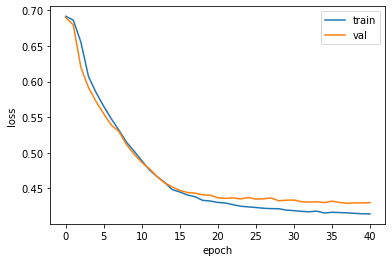

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 2개의 층을 연결하기

In [10]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [11]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 27s 74ms/step - loss: 0.6928 - accuracy: 0.5341 - val_loss: 0.6918 - val_accuracy: 0.5964
Epoch 2/100
313/313 [==============================] - 22s 71ms/step - loss: 0.6908 - accuracy: 0.5918 - val_loss: 0.6860 - val_accuracy: 0.6488
Epoch 3/100
313/313 [==============================] - 23s 72ms/step - loss: 0.6808 - accuracy: 0.6559 - val_loss: 0.6529 - val_accuracy: 0.6850
Epoch 4/100
313/313 [==============================] - 23s 74ms/step - loss: 0.6222 - accuracy: 0.6990 - val_loss: 0.5393 - val_accuracy: 0.7372
Epoch 5/100
313/313 [==============================] - 23s 74ms/step - loss: 0.5308 - accuracy: 0.7431 - val_loss: 0.5083 - val_accuracy: 0.7588
Epoch 6/100
313/313 [==============================] - 23s 75ms/step - loss: 0.5072 - accuracy: 0.7588 - val_loss: 0.4889 - val_accuracy: 0.7702
Epoch 7/100
313/313 [==============================] - 23s 75ms/step - loss: 0.4858 - accuracy: 0.7729 - val_loss: 0.4781 - val_ac

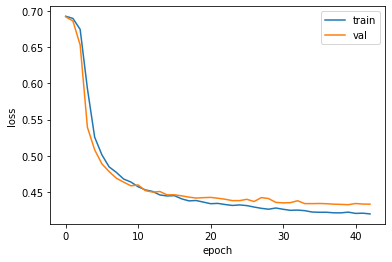

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# GRU 신경망 훈련하기

In [13]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [14]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 42ms/step - loss: 0.6923 - accuracy: 0.5290 - val_loss: 0.6902 - val_accuracy: 0.5672
Epoch 2/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6891 - accuracy: 0.5762 - val_loss: 0.6861 - val_accuracy: 0.5872
Epoch 3/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6838 - accuracy: 0.6096 - val_loss: 0.6789 - val_accuracy: 0.6104
Epoch 4/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6750 - accuracy: 0.6257 - val_loss: 0.6668 - val_accuracy: 0.6268
Epoch 5/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6606 - accuracy: 0.6503 - val_loss: 0.6444 - val_accuracy: 0.6568
Epoch 6/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6322 - accuracy: 0.6703 - val_loss: 0.6002 - val_accuracy: 0.7024
Epoch 7/100
313/313 [==============================] - 13s 40ms/step - loss: 0.5724 - accuracy: 0.7166 - val_loss: 0.5260 - val_ac

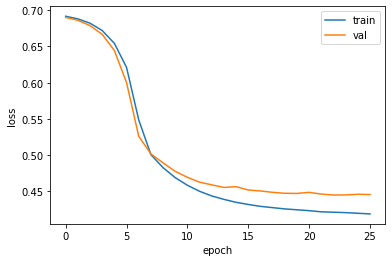

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 마무리

In [16]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.h5')

rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 10s 11ms/step - loss: 0.4271 - accuracy: 0.7994


[0.4270760416984558, 0.7994400262832642]